In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
import seaborn as sns

import matplotlib.pyplot as plt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


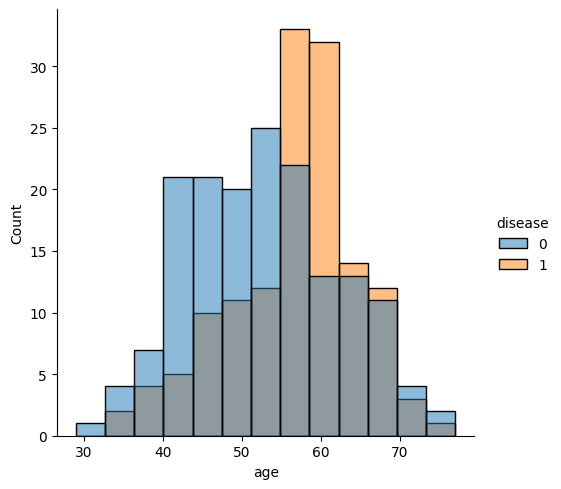

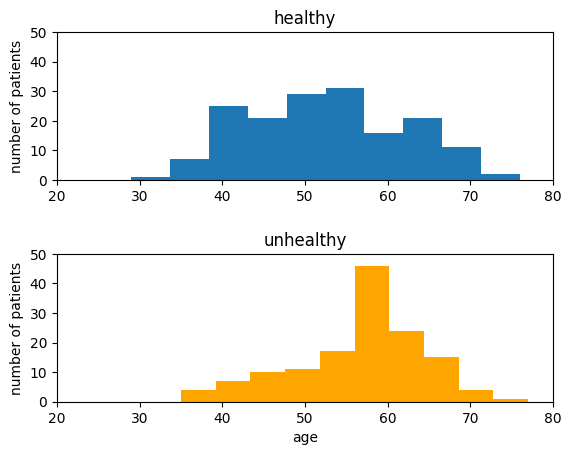

In [15]:
df = pd.read_csv('cleveland.csv')

df = df.rename({'num':'disease'}, axis=1)
df['disease'] = df.disease.apply(lambda x: min(x, 1))
display(df.head(5))
sns.displot(data=df, x='age', hue='disease')
# Plot histograms
fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].age);
# ax1.set_xlabel('age');
ax1.set_ylabel('number of patients');
ax1.set_xlim(20, 80);
ax1.set_ylim(0, 50);
ax1.set_title('healthy');

ax2.hist(df[df.disease == 1].age, color='orange');
ax2.set_xlabel('age');
ax2.set_ylabel('number of patients');
ax2.set_xlim(20, 80);
ax2.set_ylim(0, 50);
ax2.set_title('unhealthy');


In [28]:
# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')

# Create a two-dimensional array. This is basically a one-dimensional array with
# single-element arrays of patient ages in the second dimension. We're going to
# search for neighbors using only the age dimension.
X = [[x] for x in df.age]
X

# This builds an index data structure under the hood for query performance
fit = nn.fit(X)

# Find the k nearest neighbors
distances, indices = fit.kneighbors([[70]])
display(distances)
display(indices)
distances, indices

# Get the patients that are near the age
nbrs = df.iloc[indices[0]]
display(nbrs)

# Print how many patients are sick and how many are healthy
healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease
print('healthy: {}\nsick: {}'.format(healthy, sick))

array([[0., 0., 0., 0., 1.]])

array([[258, 155, 170, 136, 189]], dtype=int64)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
258,70.0,1.0,2.0,156.0,245.0,0.0,2.0,143.0,0.0,0.0,1.0,0.0,3.0,0
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
170,70.0,1.0,3.0,160.0,269.0,0.0,0.0,112.0,1.0,2.9,2.0,1.0,7.0,1
136,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,1
189,69.0,1.0,3.0,140.0,254.0,0.0,2.0,146.0,0.0,2.0,2.0,3.0,7.0,1


healthy: 1
sick: 4


In [29]:
from sklearn.metrics import precision_recall_fscore_support


## From what I understand, the below is doing this:
## 1. getting all of the values and doing nn.fit(X) to do something cool
## 2. getting a sample of the data based on n
## 3. taking the sample, and grabbing the values for disease, age, etc, for each of them
## 4. We are then grabbing the k-nearest neighbors of each sample based on patientsX (age, trestbps, each of the patients data).
## 5. Predict all of them

# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=6, metric='euclidean', algorithm='auto')
# This builds an index data structure under the hood for query performance
X = df[['age', 'trestbps']].values

fit = nn.fit(X)

# Get random patients to test on
n = 50
patients = df.sample(n)
display(patients)
patientsX = patients[['age','trestbps']].values
display(patientsX)

patientsy = patients[['disease']].values
display(patientsy)

# # Find the k nearest neighbors to the patient.
distances, indices = fit.kneighbors(patientsX)
# # print('indices of k-nearest neighbors for each patient:')
display(indices)

# y_pred = []
# for i in range(n):
#     # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
#     nbrs = df.iloc[indices[i]]
#     # Drop the patient of interest
#     nbrs = nbrs.drop(patients.index[i])
#     # display(nbrs)

#     healthy = nbrs[nbrs.disease == 0].count().disease
#     sick = nbrs[nbrs.disease == 1].count().disease
#     predict = 0 if (healthy > sick) else 1
#     print(f'healthy: {healthy}, sick: {sick}, predicted: {predict}, actual: {patientsy[i][0]}')
#     y_pred.append(predict)

# # This is where we would compile how many patients are predicted
# # correctly. Remember:
# #    precision = tp/(tp+fp)  ("sloppiness")
# #    recall    = tp/(tp+fn)  ("What percentage did we find?")
# #    f-score - a balance between precision and recall
# #    support - number of positive labels
# (p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[0,1])
# print(f'precision={p}, recall={r}, f-score={f}, support={s}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,1
30,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1
93,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0
233,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0
135,55.0,0.0,2.0,135.0,250.0,0.0,2.0,161.0,0.0,1.4,2.0,0.0,3.0,0
105,54.0,1.0,2.0,108.0,309.0,0.0,0.0,156.0,0.0,0.0,1.0,0.0,7.0,0
247,47.0,1.0,4.0,110.0,275.0,0.0,2.0,118.0,1.0,1.0,2.0,1.0,3.0,1
57,41.0,1.0,4.0,110.0,172.0,0.0,2.0,158.0,0.0,0.0,1.0,0.0,7.0,1
127,54.0,1.0,4.0,110.0,239.0,0.0,0.0,126.0,1.0,2.8,2.0,1.0,7.0,1


array([[ 67., 125.],
       [ 69., 140.],
       [ 60., 158.],
       [ 44., 108.],
       [ 74., 120.],
       [ 55., 135.],
       [ 54., 108.],
       [ 47., 110.],
       [ 41., 110.],
       [ 54., 110.],
       [ 50., 150.],
       [ 60., 117.],
       [ 51., 120.],
       [ 42., 148.],
       [ 55., 160.],
       [ 39., 118.],
       [ 61., 140.],
       [ 54., 135.],
       [ 63., 124.],
       [ 66., 112.],
       [ 51.,  94.],
       [ 53., 128.],
       [ 56., 120.],
       [ 69., 160.],
       [ 45., 142.],
       [ 54., 140.],
       [ 41., 135.],
       [ 67., 152.],
       [ 54., 150.],
       [ 59., 170.],
       [ 63., 145.],
       [ 64., 125.],
       [ 56., 132.],
       [ 64., 120.],
       [ 57., 130.],
       [ 62., 120.],
       [ 44., 120.],
       [ 50., 144.],
       [ 48., 130.],
       [ 67., 115.],
       [ 58., 150.],
       [ 64., 180.],
       [ 76., 140.],
       [ 57., 128.],
       [ 57., 132.],
       [ 68., 180.],
       [ 57., 150.],
       [ 35.,

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

array([[ 71, 143, 294, 252, 245,   2],
       [189,  30,  48, 299, 124,  32],
       [184, 199,  91, 278,  75, 153],
       [ 93,  74, 204, 298, 145,  57],
       [233, 161, 194, 159,   2, 245],
       [135,  63, 181, 291,  38, 167],
       [105, 221, 176, 228, 162, 127],
       [247,  16, 298, 145, 226, 169],
       [ 57, 240,  29, 220, 204, 147],
       [228, 127, 162, 105, 221, 176],
       [ 47, 150,  69,  67, 207,  28],
       [ 31, 244, 108, 285,  72,  22],
       [253,  25, 198,  84, 104, 112],
       [182,  28, 268,  69, 205,  61],
       [153, 234, 199, 184, 146, 296],
       [109, 211, 295, 210, 186, 239],
       [270, 158, 173,  66,   6, 140],
       [ 63, 135, 230,  98, 181, 167],
       [294, 129, 143,  76,  71, 249],
       [229,  73,  20, 152, 273, 224],
       [131, 122, 160, 163, 246,  80],
       [ 87, 142, 266,  95, 282,  49],
       [  5, 289, 215,   7,  26,  64],
       [196, 170,   1,  42, 271, 187],
       [205,  61, 272,  85,  35, 197],
       [ 17, 123,   9,  1

In [ ]:
# New addition